<a class="anchor" id="Link_1"></a>

<div style="font-family:Georgia;padding:20px;line-height:25px;background-color: #F0FFFF;color:DarkCyan;border-style: solid;border-radius:10px 70px;"><font style="font-family:Georgia; font-size:180%;font-weight:bold;color:DarkCyan;"> Importing Modules and Libraries</font>  </div>

In [1]:
import tensorflow.keras as ke
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

2024-05-08 16:16:00.173324: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 16:16:00.173489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 16:16:00.320175: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<a class="anchor" id="Link_1"></a>

<div style="font-family:Georgia;padding:20px;line-height:25px;background-color: #F0FFFF;color:DarkCyan;border-style: solid;border-radius:10px 70px;"><font style="font-family:Georgia; font-size:180%;font-weight:bold;color:DarkCyan;"> Data Loading & Transformation & Preprocessing </font>  </div>

In [2]:
data=pd.read_csv('/kaggle/input/vguard/Quote-Equity-VGUARD-EQ-08-05-2023-to-08-05-2024.csv')

In [3]:
price=data[['close ']]

In [4]:
def to_date(date_string):
    date_object = datetime.strptime(date_string, "%d-%b-%Y")
    formatted_date = date_object.strftime("%Y-%m-%d")
    return formatted_date

In [5]:
value=pd.to_datetime(data['Date '].apply(to_date))

In [6]:
price.set_index(value,inplace=True)

<Axes: xlabel='Date '>

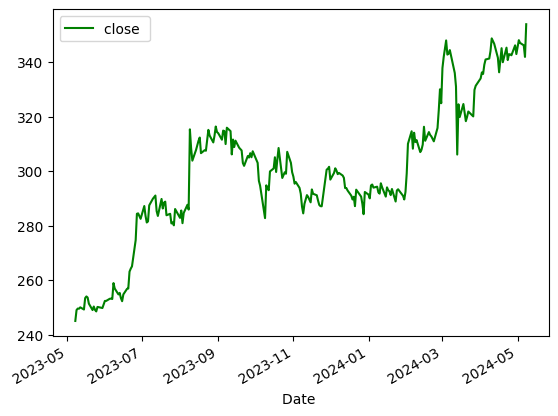

In [7]:
price.plot(color='g')

In [8]:
price=price.iloc[::-1]

In [9]:
scaler=MinMaxScaler()
scaled_price=scaler.fit_transform(price)

In [10]:
scaled_price=scaled_price.ravel()

In [11]:
def list_maker(array,elements_count):
    outer_list=[]
    for i in range(len(array)):
        if i == len(array)- elements_count+1:
            break
        outer_list.extend([array[i:i+elements_count]])
    return outer_list

In [12]:
newvalues=list_maker(scaled_price,5)

In [13]:
newdf=pd.DataFrame(newvalues,columns=['Instance {}'.format(i) for i in range(1,6)])

In [14]:
target=newdf[['Instance 5']]
xdata=newdf.drop('Instance 5',axis=1)

In [15]:
train_size=round(xdata.shape[0]*0.75)
validation_size=round(xdata.shape[0]*0.10)
test_size=xdata.shape[0]-train_size-validation_size


In [16]:
xtrain=xdata.iloc[:train_size].values
ytrain=target.iloc[:train_size].values
xval=xdata.iloc[train_size:train_size+validation_size].values
yval=target.iloc[train_size:train_size+validation_size].values
xtest=xdata.iloc[train_size+validation_size:].values
ytest=target.iloc[train_size+validation_size:].values

In [17]:
#sample,timestep,feature
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xval=xval.reshape(xval.shape[0],xval.shape[1],1)

In [18]:
xtrain.shape

(184, 4, 1)

<a class="anchor" id="Link_1"></a>

<div style="font-family:Georgia;padding:20px;line-height:25px;background-color: #F0FFFF;color:DarkCyan;border-style: solid;border-radius:10px 70px;"><font style="font-family:Georgia; font-size:180%;font-weight:bold;color:DarkCyan;">Machine Learning Using LSTM</font>  </div>

In [19]:
input_shape=xtrain.shape[1],xtrain.shape[2]
hidden_nodes=100

In [20]:
model=ke.Sequential()
model.add(ke.layers.LSTM(units=50,return_sequences=True,activation='relu',input_shape=input_shape))
model.add(ke.layers.LSTM(units=50,return_sequences=True,activation='relu'))
model.add(ke.layers.LSTM(units=50))
model.add(ke.layers.Dense(1))

model.compile(loss='mse',optimizer='adam')

In [21]:
model.fit(xtrain,ytrain,batch_size=20,validation_data=(xval,yval),epochs=50)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.1693 - val_loss: 0.3565
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0909 - val_loss: 0.1356
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0209 - val_loss: 0.0178
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0277 - val_loss: 0.0767
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0188 - val_loss: 0.0729
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0177 - val_loss: 0.0313
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - val_loss: 0.0332
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0101 - val_loss: 0.0281
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081 - val_loss: 0.0109
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0070 - val_loss: 0.0098
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0049 - val_loss: 0.0068
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038 - v

In [22]:
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [23]:
values=model.predict(xtest)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step


In [24]:
predicted=scaler.inverse_transform(values)
true=scaler.inverse_transform(ytest)

In [25]:
predicted=np.round(predicted.ravel(),decimals=2)
true=true.ravel()

<a class="anchor" id="Link_2"></a>

<div style="font-family:Georgia;padding:20px;line-height:25px;background-color: #F0FFFF;color:DarkCyan;border-style: solid;border-radius:10px 70px;"><font style="font-family:Georgia; font-size:180%;font-weight:bold;color:DarkCyan;">True Values Vs Predicted Values</font>  </div>

In [26]:
pd.DataFrame(dict(Predicted=predicted,True_Values=true))

,Predicted,True_Values
0,340.010010,331.05
1,338.380005,306.10
2,333.040009,324.55
3,324.459991,319.85
4,317.950012,324.65
5,312.790009,321.40
6,319.480011,318.35
7,318.200012,319.95
8,318.739990,321.90
9,316.980011,320.10


In [27]:
train=price.iloc[:-predicted.size]

In [28]:
test=price.iloc[-predicted.size:]

In [29]:
predicted=pd.DataFrame(predicted,columns=['close ']).set_index(test.index)

<a class="anchor" id="Link_2"></a>

<div style="font-family:Georgia;padding:20px;line-height:25px;background-color: #F0FFFF;color:DarkCyan;border-style: solid;border-radius:10px 70px;"><font style="font-family:Georgia; font-size:180%;font-weight:bold;color:DarkCyan;"> Model Performance Visualizations</font>  </div>

<Axes: title={'center': 'Training Values'}, xlabel='Date '>

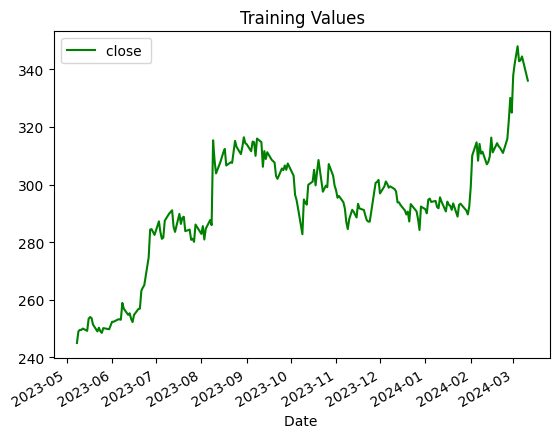

In [30]:
train.plot(color='g',title='Training Values')

<Axes: title={'center': 'Test Values'}, xlabel='Date '>

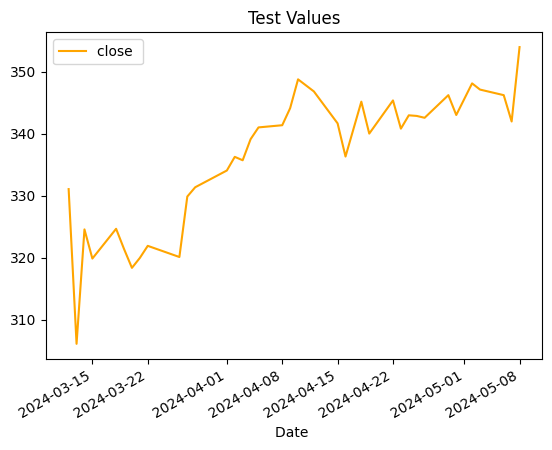

In [31]:
test.plot(color='orange',title='Test Values')

<Axes: title={'center': 'Predicted Values'}, xlabel='Date '>

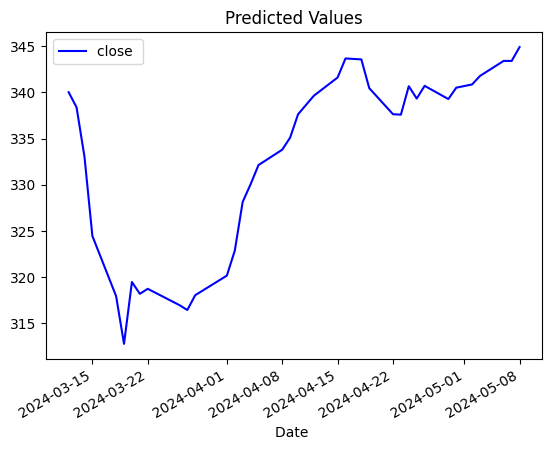

In [32]:
predicted.plot(color='blue',title='Predicted Values')

In [33]:
mse,mae,rmse=mean_squared_error(true,predicted),mean_absolute_error(true,predicted),np.sqrt(mean_squared_error(true,predicted))

Text(0.5, 1.0, 'Metrics Comparision')

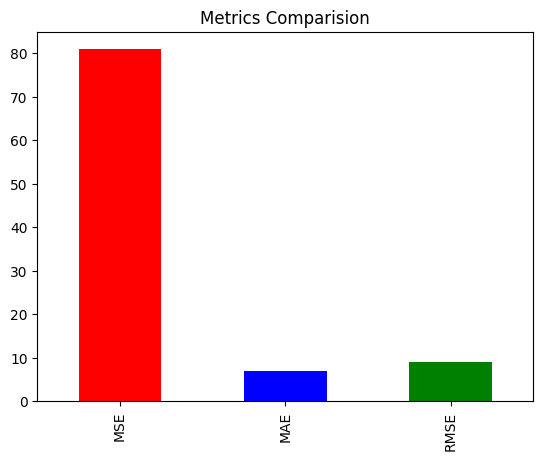

In [34]:
pd.Series([mse,mae,rmse]).plot(kind='bar',color=['red','blue','green'])
plt.xticks([0,1,2],['MSE','MAE','RMSE'])
plt.title('Metrics Comparision')


Text(0.5, 1.0, 'Actual Vs Predicted')

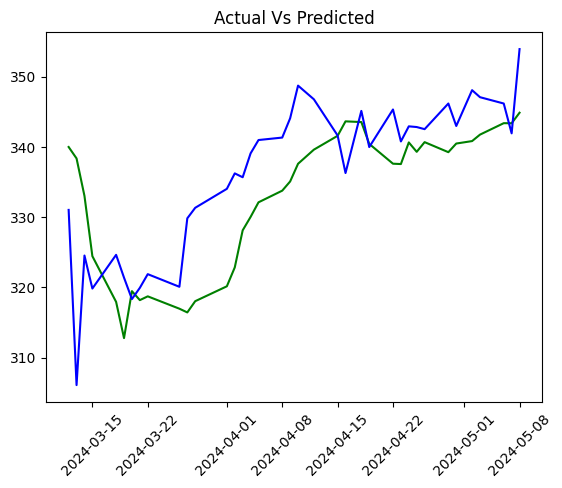

In [35]:
plt.plot(predicted,label='Predicted Values',color='green')
plt.plot(test,label='Actual Values',color='blue')
plt.xticks(rotation=45)
plt.title('Actual Vs Predicted')